This project focuses on predicting house prices using machine learning techniques. It involves preparing and analyzing real housing data, building multiple regression models, and evaluating their performance to select the most accurate model for price prediction.

In [31]:
#Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
#Loading daraset
df = pd.read_csv("C:\\Users\\user\\Desktop\\HousingPrices.csv")

In [6]:
#Checking the data attributes
df.shape

(1460, 9)

In [7]:
#Printing the first 5 rows
df.head()

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
0,2003,854,1710,2,1,3,8,2008,208500
1,1976,0,1262,2,0,3,6,2007,181500
2,2001,866,1786,2,1,3,6,2008,223500
3,1915,756,1717,1,0,3,7,2006,140000
4,2000,1053,2198,2,1,4,9,2008,250000


In [8]:
#Checking the column types
df.dtypes

YearBuilt       int64
2ndFlrSF        int64
GrLivArea       int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
TotRmsAbvGrd    int64
YrSold          int64
SalePrice       int64
dtype: object

In [9]:
#Summary of the data statistics for numeric columns
df.describe()

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,346.992466,1515.463699,1.565068,0.382877,2.866438,6.517808,2007.815753,180921.195890
std,30.202904,436.528436,525.480383,0.550916,0.502885,0.815778,1.625393,1.328095,79442.502883
min,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,34900.000000
25%,1954.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,5.000000,2007.000000,129975.000000
50%,1973.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,6.000000,2008.000000,163000.000000
75%,2000.000000,728.000000,1776.750000,2.000000,1.000000,3.000000,7.000000,2009.000000,214000.000000
max,2010.000000,2065.000000,5642.000000,3.000000,2.000000,8.000000,14.000000,2010.000000,755000.000000


In [10]:
#Pick target and features
target = 'SalePrice'

In [11]:
# Separate features (x) and target (y)
x = df.drop(columns=[target])
y = df[target]

In [12]:
x

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold
0,2003,854,1710,2,1,3,8,2008
1,1976,0,1262,2,0,3,6,2007
2,2001,866,1786,2,1,3,6,2008
3,1915,756,1717,1,0,3,7,2006
4,2000,1053,2198,2,1,4,9,2008
...,...,...,...,...,...,...,...,...
1455,1999,694,1647,2,1,3,7,2007
1456,1978,0,2073,2,0,3,7,2010
1457,1941,1152,2340,2,0,4,9,2010
1458,1950,0,1078,1,0,2,5,2010


In [13]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [15]:
# Drop obvious ID columns if present
id_like = [c for c in x.columns if c.lower() in ['id','index','rowid']]
x = x.drop(columns=id_like, errors='ignore')

In [16]:
# Identify numeric and categorical features
numeric_features = x.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = x.select_dtypes(include=['object','category']).columns.tolist()

print("\nNumber of numeric features:", len(numeric_features))
print("Number of categorical features:", len(categorical_features))


Number of numeric features: 8
Number of categorical features: 0


In [17]:
#Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x

,YearBuilt,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,YrSold
0,2003,854,1710,2,1,3,8,2008
1,1976,0,1262,2,0,3,6,2007
2,2001,866,1786,2,1,3,6,2008
3,1915,756,1717,1,0,3,7,2006
4,2000,1053,2198,2,1,4,9,2008
...,...,...,...,...,...,...,...,...
1455,1999,694,1647,2,1,3,7,2007
1456,1978,0,2073,2,0,3,7,2010
1457,1941,1152,2340,2,0,4,9,2010
1458,1950,0,1078,1,0,2,5,2010


In [19]:
#Preprocessing pipelines

# For numeric: fill missing with median and scale
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [21]:
# For categorical: fill missing with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [22]:
# Combine them
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [36]:
#Define and train models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Build a full pipeline: preprocessing + model
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    # Train
    pipe.fit(x_train, y_train)
    
    # Predict on test set
    y_pred = pipe.predict(x_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")



Training Linear Regression...
Linear Regression - RMSE: 45482.53, MAE: 29941.76, R2: 0.7303

Training Decision Tree...
Decision Tree - RMSE: 47372.42, MAE: 32185.86, R2: 0.7074

Training Random Forest...
Random Forest - RMSE: 32517.61, MAE: 22534.55, R2: 0.8621


In [37]:

# Step 6 — Compare model performance
print("\nModel performance summary:")
for name, metrics in results.items():
    print(f"{name:20s} | RMSE: {metrics['RMSE']:.2f} | MAE: {metrics['MAE']:.2f} | R2: {metrics['R2']:.4f}")



Model performance summary:
Linear Regression    | RMSE: 45482.53 | MAE: 29941.76 | R2: 0.7303
Decision Tree        | RMSE: 47372.42 | MAE: 32185.86 | R2: 0.7074
Random Forest        | RMSE: 32517.61 | MAE: 22534.55 | R2: 0.8621


In [38]:
# Pick the best model based on R2
best_model_name = max(results, key=lambda n: results[n]['R2'])
print("\nBest model is:", best_model_name)


Best model is: Random Forest


In [40]:
#Visualize predictions of best model
best_model = models[best_model_name]
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', best_model)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

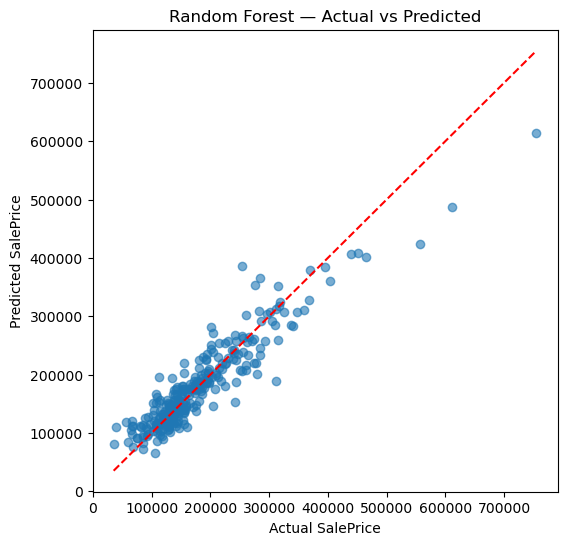

In [41]:
# Actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"{best_model_name} — Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()

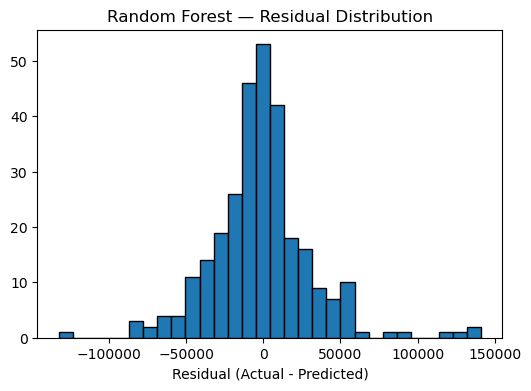

In [42]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residual (Actual - Predicted)")
plt.title(f"{best_model_name} — Residual Distribution")
plt.show()

In [44]:
#Feature importance (Random Forest only)

if best_model_name == "Random Forest":
    # Get transformed feature names
    preprocessor.fit(x_train)
    feature_names = preprocessor.get_feature_names_out()


Top 15 feature importances:
num__GrLivArea       0.504894
num__YearBuilt       0.323446
num__2ndFlrSF        0.105822
num__TotRmsAbvGrd    0.019901
num__BedroomAbvGr    0.018483
num__YrSold          0.016104
num__FullBath        0.005870
num__HalfBath        0.005480
dtype: float64


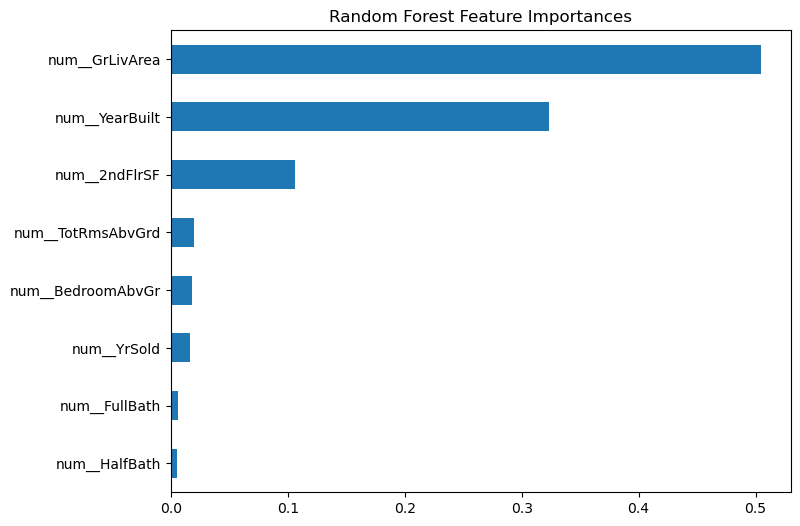

In [50]:

    rf = best_model
    rf.fit(preprocessor.transform(x_train), y_train)
    
    importances = pd.Series(rf.feature_importances_, index=feature_names)
    top = importances.sort_values(ascending=False).head(15)
    
    print("\nTop 15 feature importances:")
    print(top)
    
    top.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title("Random Forest Feature Importances")
    plt.show()

SUMMARY
I worked on predicting house prices using a dataset that contained different features about houses and their sale prices.
I began by loading and exploring the dataset to understand its structure, check for missing values, and identify the types of features available.

I separated the data into features (inputs) and the target (SalePrice), then split it into training and testing sets to evaluate how well the models would perform on unseen data.
I built preprocessing pipelines to handle numeric and categorical data properly, including imputing missing values, scaling numeric features, and one-hot encoding categorical ones.

After preparing the data, I trained three different regression models: Linear Regression, Decision Tree, and Random Forest.
I evaluated their performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.

From my results, the Random Forest model performed the best, achieving the highest R² score and the lowest prediction error on the test set.
I also visualized the model’s predictions against the actual prices, analyzed the residuals, and checked the most important features influencing house prices.

This entire process helped me understand the data better and build a reliable model that can predict house prices with good accuracy.